# Домашнее задание №3

In [3]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

In [4]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
data['Dataset']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      2
9      1
10     1
11     1
12     2
13     1
14     1
15     2
16     1
17     2
18     1
19     1
20     1
21     1
22     1
23     1
24     2
25     1
26     1
27     1
28     2
29     2
      ..
553    1
554    1
555    1
556    1
557    1
558    1
559    1
560    1
561    1
562    1
563    1
564    2
565    1
566    2
567    1
568    1
569    1
570    1
571    1
572    1
573    1
574    1
575    1
576    1
577    1
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 583, dtype: int64

Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


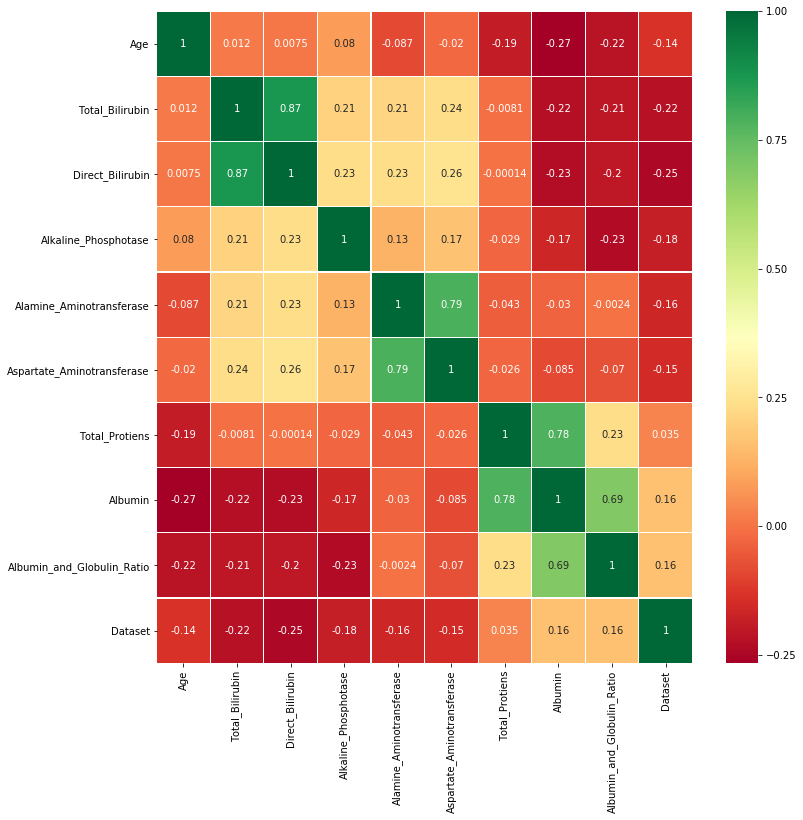

In [6]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [7]:
data['Albumin_and_Globulin_Ratio'].isnull().sum()

4

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin. Построить график. Строим прямую с помощью уравнения которое мы посчитали. Предсказать несколько элементов из таблицы с помощью метода predict() и сравнить с результатом табличным.

In [8]:
from sklearn.linear_model import LinearRegression
direct = data['Direct_Bilirubin']
total = data['Total_Bilirubin']
model = LinearRegression()
result = model.fit(np.array(direct).reshape(-1,1), total)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 0.42502700059429843
slope: [1.93375953]


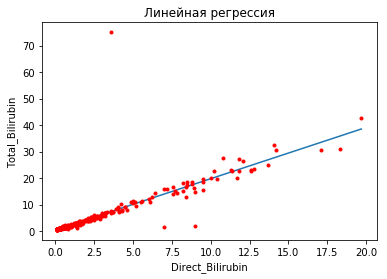

In [9]:
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(min(direct), max(direct), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(direct, total, 'r.')
plt.show()

In [10]:
model.predict(np.array([16]).reshape(-1, 1))

array([31.36517951])

In [11]:
model.predict(np.array([20]).reshape(-1, 1))

array([39.10021764])

Построить многомерную линейную регрессию для предсказания болезни (Dataset) от двух параметров. Параметры подобрать с помощью матрицы корреляций. Предсказать несколько значений из таблицы и сравнить результат модели от табличного значения.

Исходя из того, что с параметром dataset наиболее коррелирует Direct_Bilirubin и Total_Bilirubin (отрицательная корреляция) и  Albumin положительная корреляция. Хотя она маленькая.

In [12]:
data = data.dropna()
db = data['Direct_Bilirubin']
tb = data['Total_Bilirubin']
alag =  data['Albumin_and_Globulin_Ratio']
al = data['Albumin']
ds = data['Dataset']
x = np.vstack([ np.array(alag), np.array(al)]).T
print('x - это двумерная матрица, где колонки - это cp и exang : ')
print(x[:3])
y = np.array(ds)
model = LinearRegression().fit(x, y)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

x - это двумерная матрица, где колонки - это cp и exang : 
[[0.9  3.3 ]
 [0.74 3.2 ]
 [0.89 3.3 ]]
intercept: 0.9889106127885423
slope: [0.14273578 0.05126106]


In [13]:
print('Предсказание модели: ', model.predict(x[0:3]))


Предсказание модели:  [1.2865343  1.25857047 1.28510694]


In [14]:
print('Предсказание модели: ', model.predict(x[25:30]))

Предсказание модели:  [1.28432482 1.28432482 1.36523777 1.22190561 1.30995535]


Попробуем улучшить предсказание добавив параметры


In [15]:
del data['Gender']

In [16]:
data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [17]:
x = np.vstack([np.array(data['Age']),
 np.array(data['Total_Bilirubin']),
np.array(data['Direct_Bilirubin']),
np.array(data['Alkaline_Phosphotase']),
np.array(data['Alamine_Aminotransferase']),
np.array(data['Aspartate_Aminotransferase']),
np.array(data['Total_Protiens']),
np.array(data['Albumin']),
np.array(data['Albumin_and_Globulin_Ratio']),
              ]).T

In [18]:

print(x[:3])
y = np.array(data['Dataset'])
model = LinearRegression().fit(x, y)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

[[6.50e+01 7.00e-01 1.00e-01 1.87e+02 1.60e+01 1.80e+01 6.80e+00 3.30e+00
  9.00e-01]
 [6.20e+01 1.09e+01 5.50e+00 6.99e+02 6.40e+01 1.00e+02 7.50e+00 3.20e+00
  7.40e-01]
 [6.20e+01 7.30e+00 4.10e+00 4.90e+02 6.00e+01 6.80e+01 7.00e+00 3.30e+00
  8.90e-01]]
intercept: 1.6420915450080669
slope: [-3.18121704e-03 -1.01111408e-04 -2.33160992e-02 -1.86857498e-04
 -3.89027885e-04  6.04125903e-05 -7.53793263e-02  1.41252753e-01
 -5.79548063e-02]


In [19]:
print('Предсказание модели: ', model.predict(x[0:3]))


Предсказание модели:  [1.29422602 1.00982282 1.1246272 ]


In [20]:
print('Предсказание модели: ', model.predict(x[25:30]))

Предсказание модели:  [1.07737931 1.07737931 0.76902713 1.45615578 1.26719997]


Кажется лучше не стало, т.к. 28 29 элемент имеют датасет 2 
Думаю, это из за того, что это проблема классификации, и её лучше решает дерево решений, или логистическая регрессия

Посчитать квартили для всех колонок. 

In [21]:
data.quantile([.25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.70,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.93,1.0
0.75,58.0,2.6,1.3,298.0,61.0,87.0,7.2,3.8,1.10,2.0


Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

/home/andrey/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


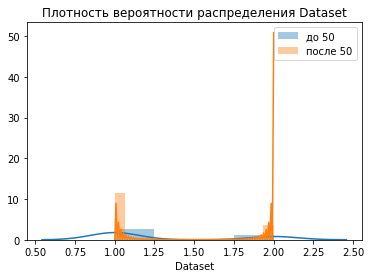

In [22]:
b50 = data[data['Age']<50]['Dataset']
a50 = data[data['Age']>=50]['Dataset']
sns.distplot(b50)
sns.distplot(a50)
plt.title('Плотность вероятности распределения Dataset')
plt.legend(['до 50', 'после 50'])
plt.show()

(array([240.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 110.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

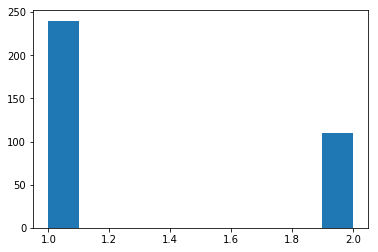

In [23]:
plt.hist(b50)

(array([174.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  55.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

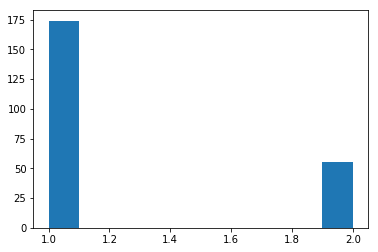

In [24]:
plt.hist(a50)

In [25]:
data_b50 = data[data['Age']<50]

In [26]:
data_b50.quantile([.25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.25,27.0,0.8,0.200,173.25,25.0,25.0,5.800,2.7,0.8,1.0
0.50,35.0,0.9,0.300,206.00,36.0,42.0,6.700,3.2,1.0,1.0
0.75,42.0,2.3,1.175,290.00,65.0,90.0,7.375,3.9,1.1,2.0


In [27]:
data_a50 = data[data['Age']>=50]
data_a50.quantile([.25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.25,55.0,0.8,0.2,180.0,21.0,25.0,5.7,2.4,0.67,1.0
0.50,60.0,1.1,0.4,214.0,33.0,40.0,6.4,3.0,0.88,1.0
0.75,66.0,2.9,1.3,332.0,54.0,79.0,7.0,3.5,1.00,1.0


В выборке >=50 отличается третий квантиль параметра Dataset, да и в целом третий квантиль отличается по всем параметрам


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [33]:


ds2_tb = data[data['Dataset']==2]['Total_Bilirubin']
stats.ttest_1samp(ds2_tb, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=-27.615411977932304, pvalue=1.4695954513944632e-63)

Исходя из того, что p value меньше чем 0.05 мы полагаем, что значение Total_Bilirubin у больных людей отличается от совокупности в целом

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [35]:
ds1_tb = data[data['Dataset']==1]['Total_Bilirubin']
stats.ttest_ind(ds1_tb, ds2_tb)


Ttest_indResult(statistic=5.422946004172417, pvalue=8.632557516910643e-08)

In [ ]:
По результату p-value можно сказать, что данные группы не схожи по Total_Bilirubin

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [62]:
restecg_0 = data[data['Age']<=30]['Dataset']

restecg_1 = data[(data['Age']>30) & (data['Age']<=55)]['Dataset']

restecg_2 = data[data['Age']>55]['Dataset']

stats.f_oneway(restecg_0, restecg_1, restecg_2)

F_onewayResult(statistic=8.508455766139265, pvalue=0.00022822150857116464)

Сравнивая три выборки, мы получаем p-value 0.0002, что означает что мы отвергаем нулевую гипотизу, и считаем что выборки отличаются

In [50]:
print(data[data['Age']<=30]['Dataset'].value_counts(), \
data[(data['Age']>30) & (data['Age']<=55)]['Dataset'].value_counts(), \
data[data['Age']>55]['Dataset'].value_counts())

1    64
2    50
Name: Dataset, dtype: int64 1    233
2     74
Name: Dataset, dtype: int64 1    117
2     41
Name: Dataset, dtype: int64


In [ ]:
в разбивке до 30 лет заболевших около 43%
в разбивке 30-55 около 24%
в разбивке 55+ около 25%

In [59]:
50*100/(64+50)
# 74*100/(233+74)
#41*100/(117+41)

43.85964912280702

In [ ]:
Но если мы возьмем 2 выборки 30-55 и 55+ вероятно что они схожи


In [61]:
stats.f_oneway( restecg_1, restecg_2)

F_onewayResult(statistic=0.19003952455143744, pvalue=0.6630869023374968)

In [ ]:
тут мы получаем p.value 0.66, что означает что мы принимаем нулевую гипотизу и считаем данные схожими

Вопросы задавать на почту yustiks@gmail.com